In [1]:
import pandas as pd
import seaborn as sb 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_csv('../House price prediction/train.csv')

In [5]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

In [4]:
df_train1=pd.read_csv('../House price prediction/train.csv',keep_default_na=False)

In [6]:
all_col=list(df_train1.columns)
all_col.remove('SalePrice')
lc=['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

In [7]:
type_dict={}

for i in all_col:
    if i in lc:
        type_dict[i]=['', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan','1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NULL', 'NaN', 'n/a','nan', 'null']
    else:
        type_dict[i]=['', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan','1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NA', 'NULL', 'NaN', 'n/a','nan', 'null']
        

In [8]:
df_train1=pd.read_csv('../House price prediction/train.csv',keep_default_na=False,na_values=type_dict)
df_test=pd.read_csv('../House price prediction/test.csv',keep_default_na=False,na_values=type_dict)

In [9]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
sum(df_train1.isna().sum()>0)

5

In [11]:
sum(df_test.isna().sum()>0)

19

In [12]:
categorical_col=list(df_train1.select_dtypes(include='object').columns)
numeric_col=list(df_train1.select_dtypes(exclude='object').columns)
numeric_col.remove('Id')
numeric_col.remove('SalePrice')

In [13]:
len(numeric_col),len(categorical_col)

(36, 43)

# Feature Engineering

## 0.'Handle Outliers'

#### 1.Detection using Histogram

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

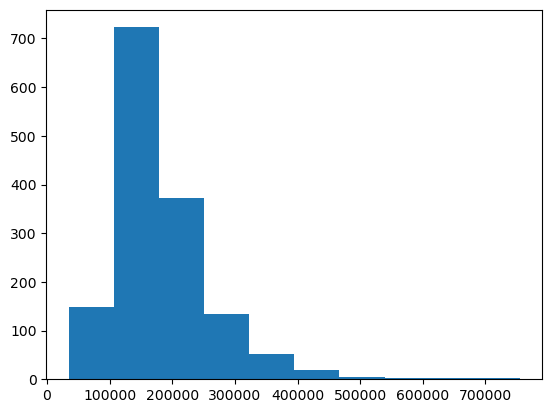

In [14]:
import matplotlib.pyplot as plt
plt.hist(df_train1['SalePrice'])

In [15]:
df_train1['SalePrice'].describe()

# Persentile is rank 
# 25%,50%,75%  25%=129975.00 means there are 25% house prices less than 129975
# this percentile is Quertiles

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [16]:
df_train1['SalePrice'].median()

163000.0

#### 2.BoxPlot Method for Find Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1f51b532210>,
 'caps': [<matplotlib.lines.Line2D at 0x1f51b5d0250>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f51bd44290>],
 'medians': [<matplotlib.lines.Line2D at 0x1f51bd47190>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f51bd47110>],
 'means': []}

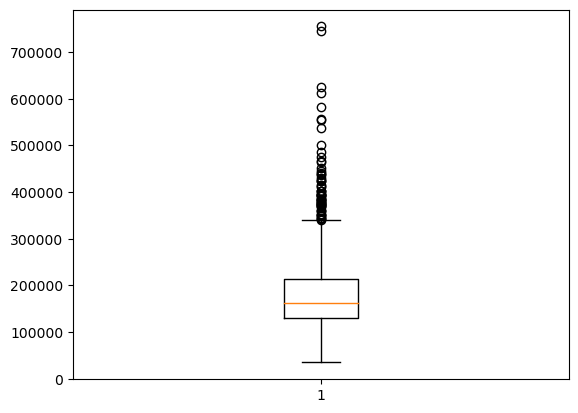

In [17]:
plt.boxplot(df_train1['SalePrice'])
#Boxplot give threshold 

#### 3.Z-Score

In [18]:
# Manually
z_score=(df_train1['SalePrice']-df_train1['SalePrice'].mean())/df_train1['SalePrice'].std()

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
z1=scaler.fit_transform(df_train1[['SalePrice']])

In [20]:
z1,z_score

(array([[ 0.34727322],
        [ 0.00728832],
        [ 0.53615372],
        ...,
        [ 1.07761115],
        [-0.48852299],
        [-0.42084081]]),
 0       0.347154
 1       0.007286
 2       0.535970
 3      -0.515105
 4       0.869545
           ...   
 1455   -0.074534
 1456    0.366036
 1457    1.077242
 1458   -0.488356
 1459   -0.420697
 Name: SalePrice, Length: 1460, dtype: float64)

In [21]:
# Outliers which are
out_l=((z_score>3)|(z_score<=-3))
df_train1[out_l]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
58,59,60,RL,66.0,13682,Pave,NA,IR2,HLS,AllPub,...,0,NA,NA,NA,0,10,2006,New,Partial,438780
178,179,20,RL,63.0,17423,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,7,2009,New,Partial,501837
185,186,75,RM,90.0,22950,Pave,NA,IR2,Lvl,AllPub,...,0,NA,GdPrv,NA,0,6,2006,WD,Normal,475000
349,350,60,RL,56.0,20431,Pave,NA,IR2,Lvl,AllPub,...,0,NA,NA,NA,0,4,2006,New,Partial,437154
389,390,60,RL,96.0,12474,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,8,2008,New,Partial,426000
440,441,20,RL,105.0,15431,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2009,WD,Normal,555000
473,474,20,RL,110.0,14977,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,7,2007,New,Partial,440000
496,497,20,RL,NaN,12692,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,430000
527,528,60,RL,67.0,14948,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,11,2008,New,Partial,446261
591,592,60,RL,97.0,13478,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,6,2009,ConLI,Normal,451950


In [22]:
df_train1[~((z_score>3)|(z_score<=-3))][numeric_col]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,500,349,0,0,0,0,0,0,2,2010
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,252,0,60,0,0,0,0,2500,5,2010
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,240,366,0,112,0,0,0,0,4,2010


In [23]:
df_train1[df_train['SalePrice']>340000]['Id']

11        12
53        54
58        59
112      113
151      152
        ... 
1268    1269
1353    1354
1373    1374
1388    1389
1437    1438
Name: Id, Length: 61, dtype: int64

In [24]:
df_train1['Id']

0          1
1          2
2          3
3          4
4          5
        ... 
1455    1456
1456    1457
1457    1458
1458    1459
1459    1460
Name: Id, Length: 1460, dtype: int64

In [25]:
# df_train.drop(df_train['Id']==df_train[df_train['SalePrice']>340000]['Id'],inplace=True,errors='ignore')

## 1.Missing Data

In [26]:
#Numeric -> Median
#Categorical-> mode

from sklearn.impute import SimpleImputer

In [27]:
imputer_num=SimpleImputer(strategy='median') # we need to pass strategy 
imputer_num.fit(df_train1[numeric_col])  #it only find median of every numeric colums
df_train1[numeric_col]=imputer_num.transform(df_train1[numeric_col]) # it return numpy array /it fills missing data by respective cols median values
df_test[numeric_col]=imputer_num.transform(df_test[numeric_col])

In [28]:
imputer_cat=SimpleImputer(strategy='most_frequent') # we need to pass strategy 
imputer_cat.fit(df_train1[categorical_col])  #it only find median of every numeric colums
df_train1[categorical_col]=imputer_cat.transform(df_train1[categorical_col]) # it return numpy array /it fills missing data by respective cols median values
df_test[categorical_col]=imputer_cat.transform(df_test[categorical_col])

In [29]:
df_train1.isna().sum().sum(),df_test.isna().sum().sum()

(0, 0)

## 2.Feature Encoding

In [30]:
#Categorical Columns
len(categorical_col)

43

In [31]:
df_train1[categorical_col].nunique().sum() #find how many columns newly created after onehot encoding

266

In [32]:
#OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [33]:
ohe=OneHotEncoder(sparse=False,handle_unknown='ignore')#sparse gives sparse metrix
#handle_unknown='ignore' =if in training data there is 3 categories present and in testing if 
# any unknown chategories present at that time it ignore that categories if we assign "error" then if unknown category present then it give error 

ohe.fit(df_train1[categorical_col]) # finds unique categories from every column
# ohe.get_feature_names() #return newly created cols names


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [37]:
df_train1[ohe.get_feature_names_out()] = ohe.transform(df_train1[categorical_col]) #return numpy array

In [38]:
df_train1.shape

(1460, 347)

In [39]:
df_train1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60.0,RL,65.0,8450.0,Pave,NA,Reg,Lvl,AllPub,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,20.0,RL,80.0,9600.0,Pave,NA,Reg,Lvl,AllPub,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,60.0,RL,68.0,11250.0,Pave,NA,IR1,Lvl,AllPub,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,70.0,RL,60.0,9550.0,Pave,NA,IR1,Lvl,AllPub,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,60.0,RL,84.0,14260.0,Pave,NA,IR1,Lvl,AllPub,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
df_test[ohe.get_feature_names_out()]=ohe.transform(df_test[categorical_col])

In [42]:
df_test[categorical_col].nunique().sum() # for find unkown categories

248

In [43]:
df_train1.shape,df_test.shape

((1460, 347), (1459, 346))

## 3.Feature Scaling

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df_train1[numeric_col])

MinMaxScaler()

In [45]:
df_train1[numeric_col] = scaler.transform(df_train1[numeric_col])
df_test[numeric_col] = scaler.transform(df_test[numeric_col])

In [46]:
df_train1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,0.235294,RL,0.150685,0.033420,Pave,NA,Reg,Lvl,AllPub,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,0.000000,RL,0.202055,0.038795,Pave,NA,Reg,Lvl,AllPub,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,0.235294,RL,0.160959,0.046507,Pave,NA,IR1,Lvl,AllPub,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,0.294118,RL,0.133562,0.038561,Pave,NA,IR1,Lvl,AllPub,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,0.235294,RL,0.215753,0.060576,Pave,NA,IR1,Lvl,AllPub,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## 4.Feature Selection / Feature Reduction

In [47]:
# In feature Selection we use existing columns
# In Feature Reduction we need to Genrate new Columns
# 80=>15 Columns and it contains much of the info/variance

#For Feature Selection we use Principle  Component Analysis(PCA)

In [48]:
sel_col=df_train1.corr().columns[abs(df_train1.corr()['SalePrice'])>0.1 ] 


In [49]:
df_train1.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,1.000000,0.011156,-0.009921,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,...,-0.020738,-0.018998,0.038920,0.026133,0.007009,-0.034852,-0.009018,0.004865,0.015881,-0.020738
MSSubClass,0.011156,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,...,0.014005,-0.045156,-0.014555,0.026359,0.005003,0.016241,0.030002,0.000983,0.024359,-0.051068
LotFrontage,-0.009921,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,...,-0.051283,0.128995,-0.023074,-0.091864,-0.021725,-0.036570,-0.018040,0.016250,-0.074146,0.127293
LotArea,-0.033226,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,...,-0.015040,0.020039,-0.005722,-0.002292,-0.029126,-0.013208,0.008966,-0.010781,0.005711,0.022635
OverallQual,-0.028365,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,...,-0.021172,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,-0.034852,0.016241,-0.036570,-0.013208,-0.041677,-0.038888,-0.045601,-0.040294,-0.011783,-0.014874,...,-0.003073,-0.015827,-0.002378,0.020457,-0.014289,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
SaleCondition_Alloca,-0.009018,0.030002,-0.018040,0.008966,-0.044950,-0.033444,-0.010104,-0.020727,-0.013748,0.021369,...,-0.005337,-0.027489,-0.004131,0.035530,-0.024817,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
SaleCondition_Family,0.004865,0.000983,0.016250,-0.010781,-0.025515,-0.023873,-0.035785,-0.048056,-0.009535,0.000765,...,-0.006909,-0.035587,-0.005348,0.028599,-0.032128,-0.006177,-0.010729,1.000000,-0.252006,-0.036062
SaleCondition_Normal,0.015881,0.024359,-0.074146,0.005711,-0.143282,0.161642,-0.158427,-0.120577,-0.081539,-0.019560,...,0.027414,-0.645698,-0.097031,0.634322,-0.582947,-0.112080,-0.194663,-0.252006,1.000000,-0.654323


In [50]:
df_train1[numeric_col]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.125089,0.000000,...,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.00000,0.090909,0.50
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.173281,0.000000,...,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.363636,0.25
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.086109,0.000000,...,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.00000,0.727273,0.50
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.038271,0.000000,...,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.00000,0.090909,0.00
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.116052,0.000000,...,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.00000,1.000000,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.140411,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,0.000000,...,0.324401,0.000000,0.073126,0.000000,0.0,0.0,0.0,0.00000,0.636364,0.25
1456,0.000000,0.219178,0.055505,0.555556,0.625,0.768116,0.633333,0.074375,0.139972,0.110583,...,0.352609,0.407235,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.090909,1.00
1457,0.294118,0.154110,0.036187,0.666667,1.000,0.500000,0.933333,0.000000,0.048724,0.000000,...,0.177715,0.000000,0.109689,0.000000,0.0,0.0,0.0,0.16129,0.363636,1.00
1458,0.000000,0.160959,0.039342,0.444444,0.625,0.565217,0.766667,0.000000,0.008682,0.698100,...,0.169252,0.427071,0.000000,0.202899,0.0,0.0,0.0,0.00000,0.272727,1.00


In [51]:
from sklearn.decomposition import PCA

In [54]:
selected_cols=numeric_col+list(ohe.get_feature_names_out())
pca=PCA()
pca.fit(df_train1[selected_cols])
df_train1[selected_cols]=pca.transform(df_train1[selected_cols])
df_test[selected_cols]=pca.fit_transform(df_test[selected_cols])


In [55]:
pca.components_

array([[ 2.73155998e-03,  8.74959174e-03,  1.96569866e-03, ...,
        -2.51686270e-03, -3.30094893e-02,  6.82033993e-02],
       [ 6.59389014e-02, -1.86293461e-02, -6.18269379e-03, ...,
         9.03470014e-04, -3.86085974e-02,  2.84678966e-02],
       [-5.49097857e-02,  1.43830422e-02,  3.41823879e-03, ...,
        -7.46870922e-04, -1.60067091e-01,  1.22914488e-01],
       ...,
       [ 0.00000000e+00, -7.74388158e-31, -4.15357382e-30, ...,
         2.33353163e-17,  2.33353163e-17,  2.33353163e-17],
       [ 0.00000000e+00, -2.47360993e-31, -5.12956789e-31, ...,
         1.48202238e-17,  1.48202238e-17,  1.48202238e-17],
       [ 0.00000000e+00, -1.95156391e-17, -2.15150248e-15, ...,
        -1.38259598e-02, -1.38259598e-02, -1.38259598e-02]])

In [56]:
df_train1.shape

(1460, 347)

## 5.Model Bulding => Regression

In [58]:
selected_cols=numeric_col+list(ohe.get_feature_names_out())
len(selected_cols)

302

In [59]:
from sklearn.ensemble import RandomForestRegressor
model_rf=RandomForestRegressor()
model_rf.fit(df_train1[selected_cols],df_train1['SalePrice'])
model_rf.score(df_train1[selected_cols],df_train1['SalePrice'])

0.9642270856517225

## 6.Make Prediction & submit

In [74]:
yp=model_rf.predict(df_test[selected_cols])
df_test['SalePrice']=yp
df_test[['Id','SalePrice']].to_csv('sub_rf1.csv',index=False)


### End of the code

In [64]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(df_train1[sel_col], df_train1['SalePrice'])
score = model_lr.score(df_train1[sel_col], df_train1['SalePrice'])
print("R-squared score:", score)


R-squared score: 1.0


In [70]:
yp=model_lr.predict(df_test[sel_col])
df_test['SalePrice']=yp
df_test[['Id','SalePrice']].to_csv('sub_lr1.csv',index=False)

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [69]:

params={'n_estimators':[25,60,100,150,200],
       'max_depth':[1,2,3,4,],
       'min_samples_leaf':[1,2,3,4,5,6]}

gcvrf=GridSearchCV(RandomForestRegressor(),param_grid=params,cv=5,verbose=0,n_jobs=-1)
gcvrf.fit(df_train1[selected_cols],df_train1['SalePrice'])
gcvrf.score(df_train1[selected_cols],df_train1['SalePrice'])
yp=gcvrf.predict(df_test[selected_cols])
df_test['SalePrice']=yp
df_test[['Id','SalePrice']].to_csv('sub_gcrf.csv',index=False)